In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\shiwa\\Downloads\\disney_plus_titles.csv')

In [4]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...


In [5]:
df.shape

(1368, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [7]:
df.isnull().sum().sum()

794

In [8]:
df['release_year'].isnull().sum()

0

In [10]:
df.fillna(0, inplace = True)
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

0

In [17]:
df['release_year'].value_counts()

release_year
2020    109
2019     97
2021     82
2017     67
2018     65
       ... 
1928      1
1970      1
1944      1
1945      1
1968      1
Name: count, Length: 90, dtype: int64

In [23]:
df['type'].value_counts()

type
Movie      991
TV Show    377
Name: count, dtype: int64

In [19]:
df['listed_in'].value_counts()

listed_in
Animation, Comedy, Family                120
Action-Adventure, Animation, Comedy       75
Action-Adventure, Animation, Kids         45
Animals & Nature, Documentary, Family     40
Action-Adventure, Animation, Family       40
                                        ... 
Animation, Documentary, Family             1
Action-Adventure, Crime, Fantasy           1
Comedy, Coming of Age, Medical             1
Drama, Family, Historical                  1
Animation, Family, Mystery                 1
Name: count, Length: 317, dtype: int64

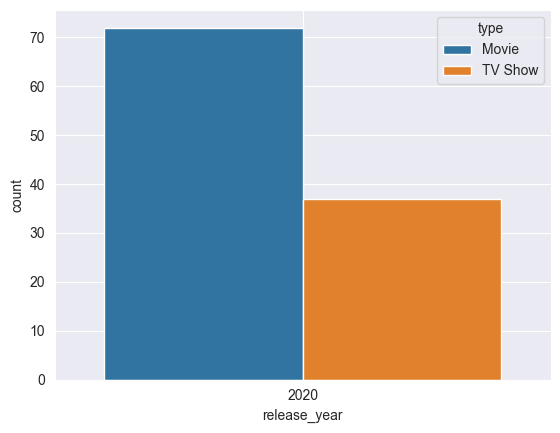

In [33]:
data = df.query('release_year == 2020')
sns.set_style('dark')
sns.countplot(data, x = 'release_year', hue = 'type')
plt.grid(True)
plt.show()

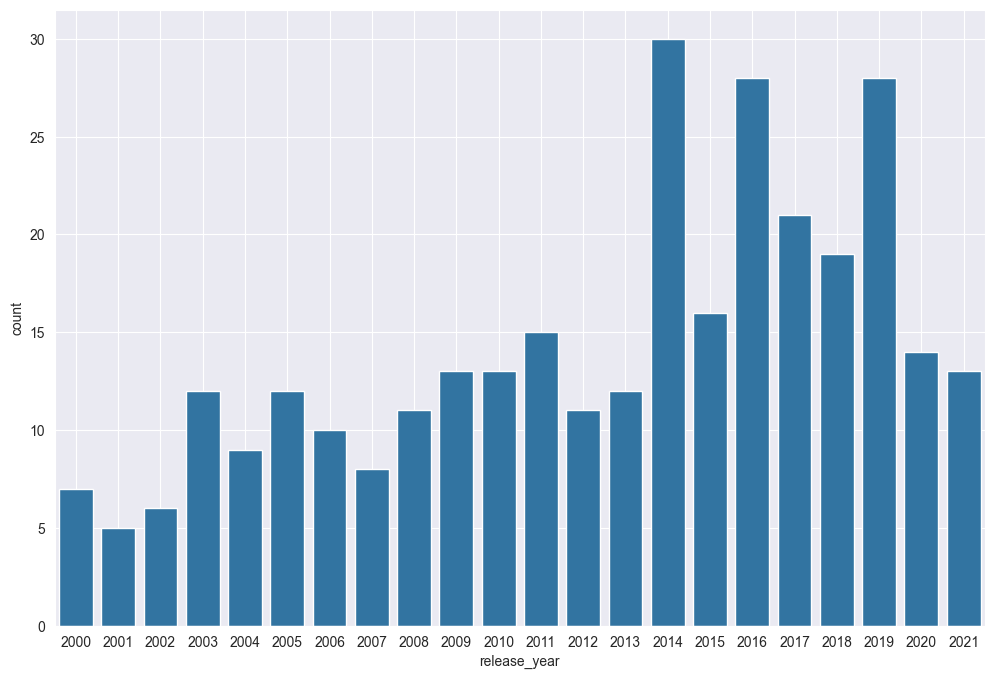

In [63]:
df[['g1','g2','g3']] = df['listed_in'].str.split(',', expand = True)
genre = df.loc[:,['release_year','g1','g2','g3']]
acad = genre.query("release_year >= 2000 and g1 == 'Action-Adventure'  or g2 == 'Action-Adventure' or g3 == 'Action-Adventure'")
plt.figure(figsize = (12,8))
sns.countplot(acad, x = 'release_year')
plt.grid(True)
plt.show()